In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [11]:
#Read the data
# from google.colab import files
# uploaded = files.upload()

import pandas as pd
cars = pd.read_csv("Toyoto_Corrola.csv")
cars.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [27]:
# Dataframe columns and rows information
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [13]:
cars.Age_08_04.nunique()

77

In [15]:
cars.Weight.nunique()

59

In [29]:
# Drop Id and Model columns as they are not useful in prediction
cars1 = cars.drop(columns=["Model","Id"])
cars1

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,4,5,1025
1432,10845,72,19000,86,3,4,5,1015
1433,8500,71,17016,86,3,4,5,1015
1434,7250,70,16916,86,3,4,5,1015


In [31]:
cars1.rename(columns = {'Age_08_04':'Age'}, inplace = True)
cars1

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,4,5,1025
1432,10845,72,19000,86,3,4,5,1015
1433,8500,71,17016,86,3,4,5,1015
1434,7250,70,16916,86,3,4,5,1015


In [33]:
# Check for null values
cars1.isna().sum()

Price        0
Age          0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [35]:
# Checking the duplicated rows
cars1[cars1.duplicated(keep=False)]

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
112,24950,8,13253,116,5,4,5,1320
113,24950,8,13253,116,5,4,5,1320


#### Observations
- There are no NULL values
- There are duplicated rows with index112 ans 113
- The continuous variable columns: Price,Age,KM, HP and Weight
- The categorical columns are Doors, Cylinders and Gears
- The Price column is the predicted (y) variable

#### EDA

In [37]:
# Drop the duplicated rows and reset the index
cars1.drop_duplicates(keep = 'first', inplace = True)
cars1.reset_index(drop=True)
cars1

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,4,5,1025
1432,10845,72,19000,86,3,4,5,1015
1433,8500,71,17016,86,3,4,5,1015
1434,7250,70,16916,86,3,4,5,1015


   Gears  count
0      5   1390
1      6     43
2      3      2
3      4      1


<Axes: xlabel='Gears', ylabel='count'>

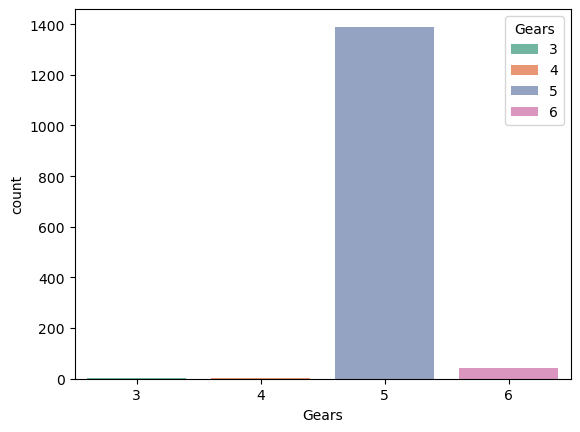

In [130]:
# Bar plot for categorical columns
import seaborn as sns
counts = cars1["Gears"].value_counts().reset_index()
print(counts)
sns.barplot(data = cars1, x = counts["Gears"], hue= counts["Gears"],y= counts["count"], palette="Set2")

   Doors  count
0      5    673
1      3    622
2      4    138
3      2      2


<Axes: xlabel='Doors', ylabel='count'>

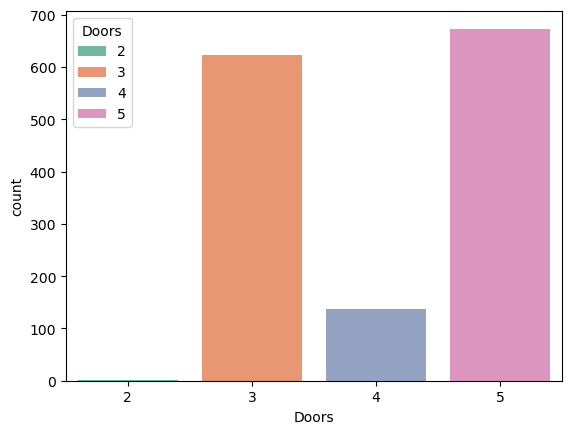

In [43]:
# Bar plot for categorical columns
import seaborn as sns
counts = cars1["Doors"].value_counts().reset_index()
print(counts)
sns.barplot(data = cars1, x = counts["Doors"], hue= counts["Doors"],y= counts["count"], palette="Set2")

   Cylinders  count
0          4   1435


<Axes: xlabel='Cylinders', ylabel='count'>

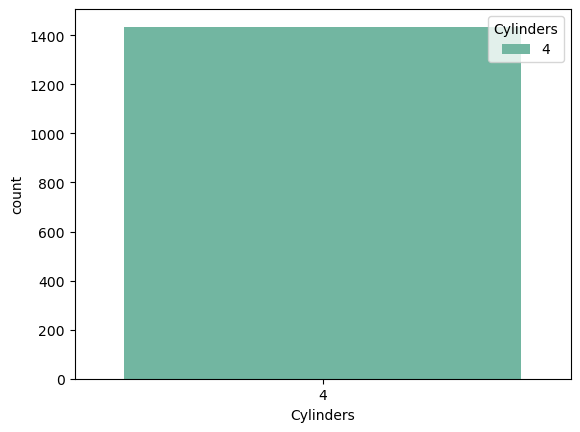

In [47]:
# Bar plot for categorical columns
import seaborn as sns
counts = cars1["Cylinders"].value_counts().reset_index()
print(counts)
sns.barplot(data = cars1, x = counts["Cylinders"], hue= counts["Cylinders"],y= counts["count"], palette="Set2")

In [51]:
# Drop the categorical columns
cars2 = cars1.drop(["Cylinders", "Gears", "Doors"], axis = 1)
cars2.head()

,Price,Age,KM,HP,Weight
0,13500,23,46986,90,1165
1,13750,23,72937,90,1165
2,13950,24,41711,90,1165
3,14950,26,48000,90,1165
4,13750,30,38500,90,1170


In [57]:
cars2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1435 non-null   int64
 1   Age     1435 non-null   int64
 2   KM      1435 non-null   int64
 3   HP      1435 non-null   int64
 4   Weight  1435 non-null   int64
dtypes: int64(5)
memory usage: 67.3 KB


In [59]:
cars2.describe()

,Price,Age,KM,HP,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1615.000000


In [61]:
cars2.corr()

,Price,Age,KM,HP,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.087143
Weight,0.575869,-0.466484,-0.023969,0.087143,1.000000


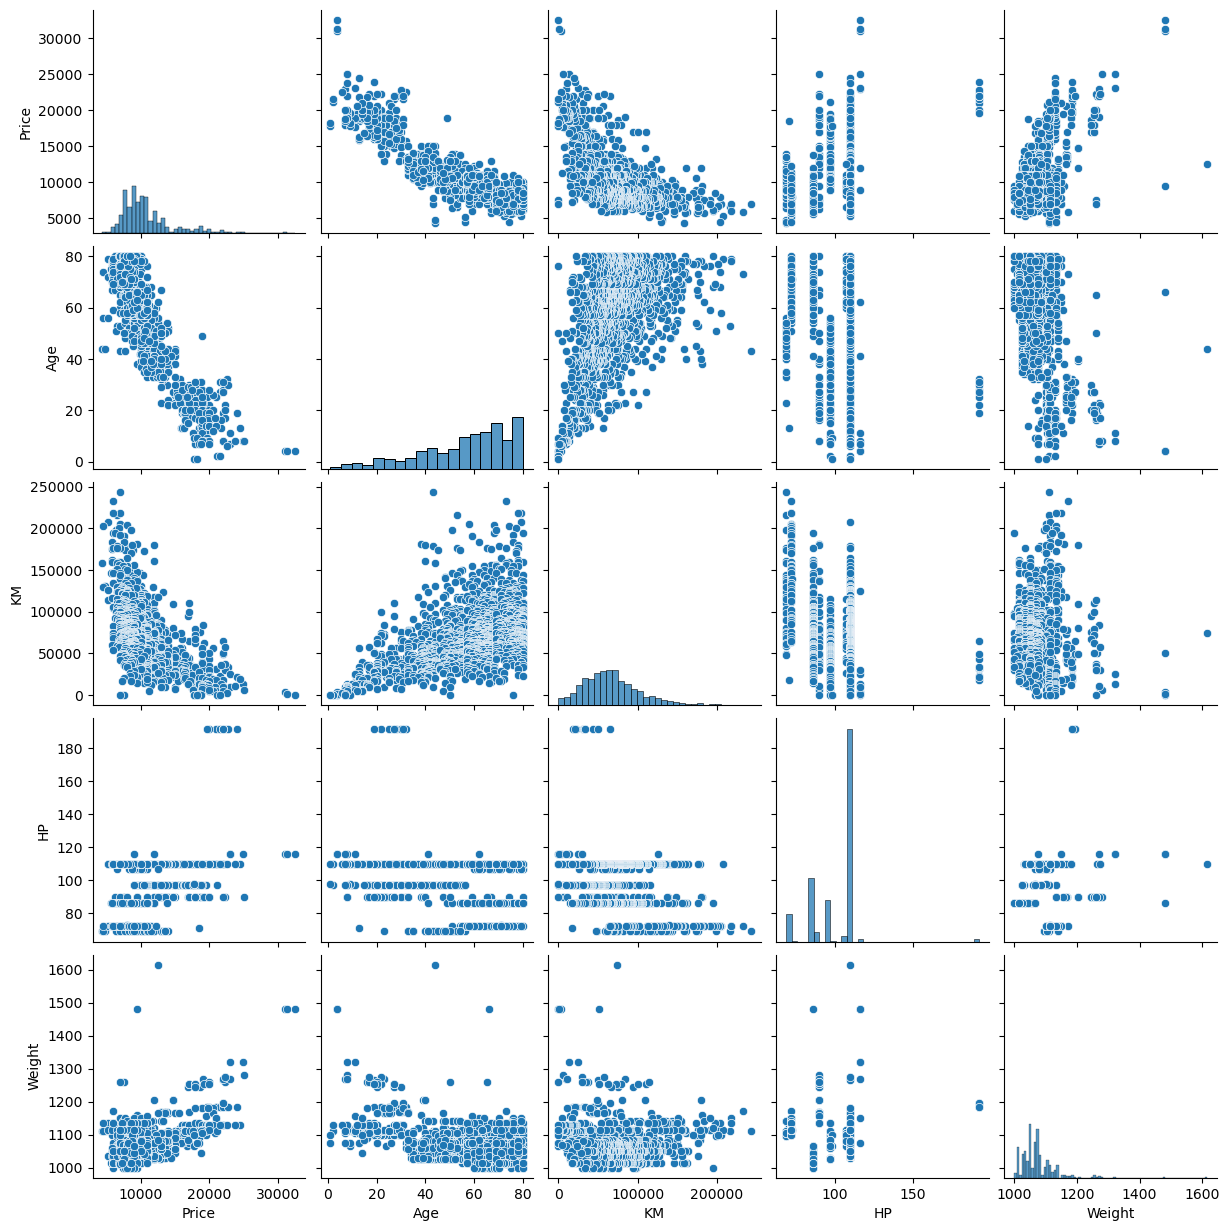

In [63]:
sns.pairplot(cars2)

## Build the model

In [65]:
#Build model
import statsmodels.formula.api as smf 
model1 = smf.ols('Price~Age+KM+HP+Weight',data=cars2).fit()

In [67]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     2206.
Date:                Fri, 12 Sep 2025   Prob (F-statistic):               0.00
Time:                        07:09:03   Log-Likelihood:                -12376.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1430   BIC:                         2.479e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3858.7559    940.086     -4.105      0.000   -5702.852   -2014.660
Age         -122.4705      2.622    -46.712      0.000    -127.613    -117.327
KM            -0.0196      0.001    -16.217      0.000      -0.022      -0.017
HP            30.2027      2.538     11.901      0.000      25.224      35.181
Weight        18.3840      0.807     22.776      0.000      16.801      19.967
==============================================================================
Omnibus:                      192.444   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1462.386
Skew:                          -0.364   Prob(JB):                         0.00
Kurtosis:                       7.892   Cond. No.                     2.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
#Coefficients
model1.params

Intercept   -3858.755884
Age          -122.470468
KM             -0.019581
HP             30.202742
Weight         18.384039
dtype: float64

In [71]:
# t and p-Values
print(model1.tvalues, '\n', model1.pvalues)

Intercept    -4.104684
Age         -46.712019
KM          -16.217270
HP           11.900841
Weight       22.776123
dtype: float64 
 Intercept     4.277518e-05
Age          5.104815e-290
KM            2.006715e-54
HP            3.300468e-31
Weight        3.163110e-98
dtype: float64


In [73]:
#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.8605512516617329, 0.8601611852328146)

## Calculate VIF values

In [75]:
rsq_Age = smf.ols('Age~KM+HP+Weight',data=cars2).fit().rsquared
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age+HP+Weight',data=cars2).fit().rsquared  
vif_KM = 1/(1-rsq_KM) 

rsq_HP = smf.ols('HP~KM+Age+Weight',data=cars2).fit().rsquared  
vif_HP = 1/(1-rsq_HP) 

rsq_Weight = smf.ols('Weight~KM+Age+HP',data=cars2).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight) 

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP', 'Weight'],'VIF':[vif_Age,vif_KM,vif_HP, vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.865213
1,KM,1.613482
2,HP,1.138294
3,Weight,1.400677


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

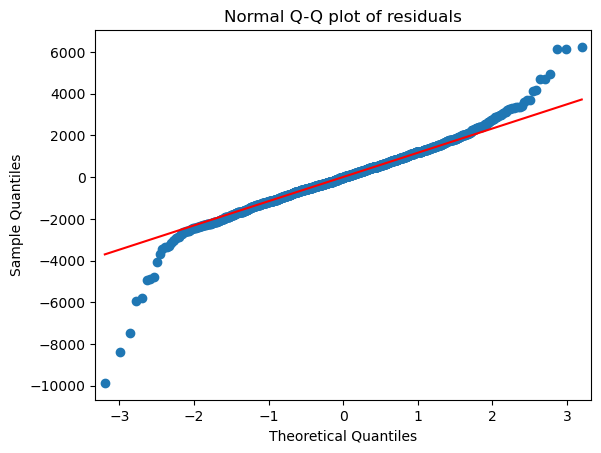

In [79]:
import statsmodels.api as sm

#model = smf.ols('MPG~VOL+SP+HP',data=cars).fit()
qqplot=sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

## Residual Plot for Homoscedasticity

In [81]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

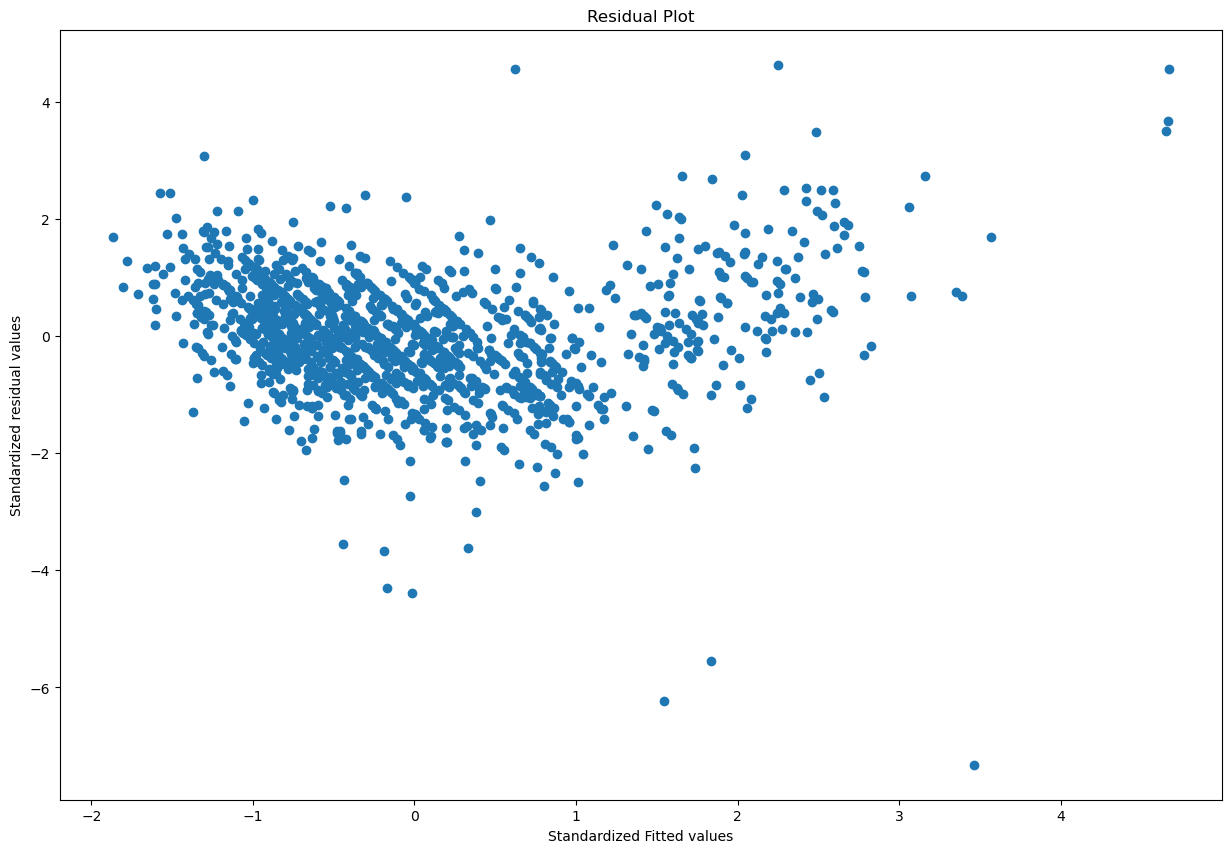

In [85]:
plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Model Deletion Diagnostics


### Detecting Influencers/Outliers -Cook's Distance

In [87]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

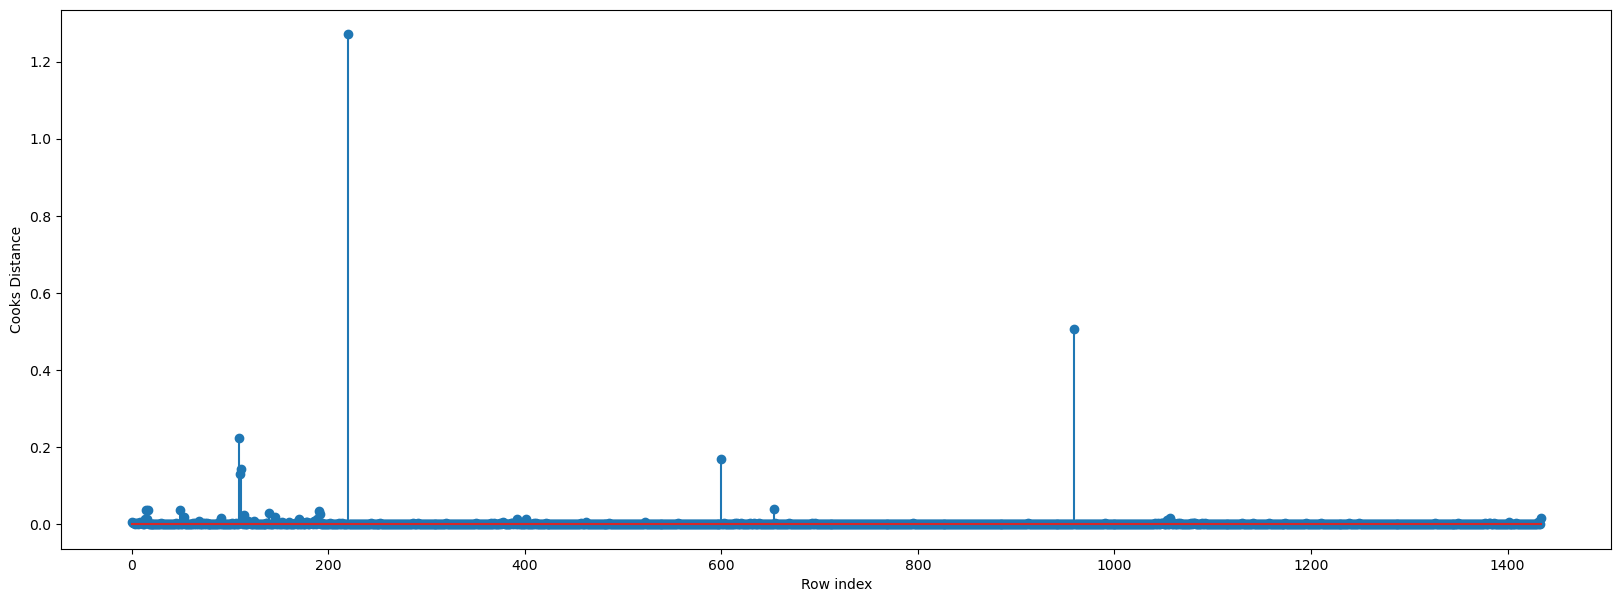

In [89]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [38]:
#The Cook's distance is considered high if it is greater than 0.5 and extreme if it is greater than 1
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(221, 1.2699400109577401)

In [97]:
k = 4
n = 1435
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.010452961672473868

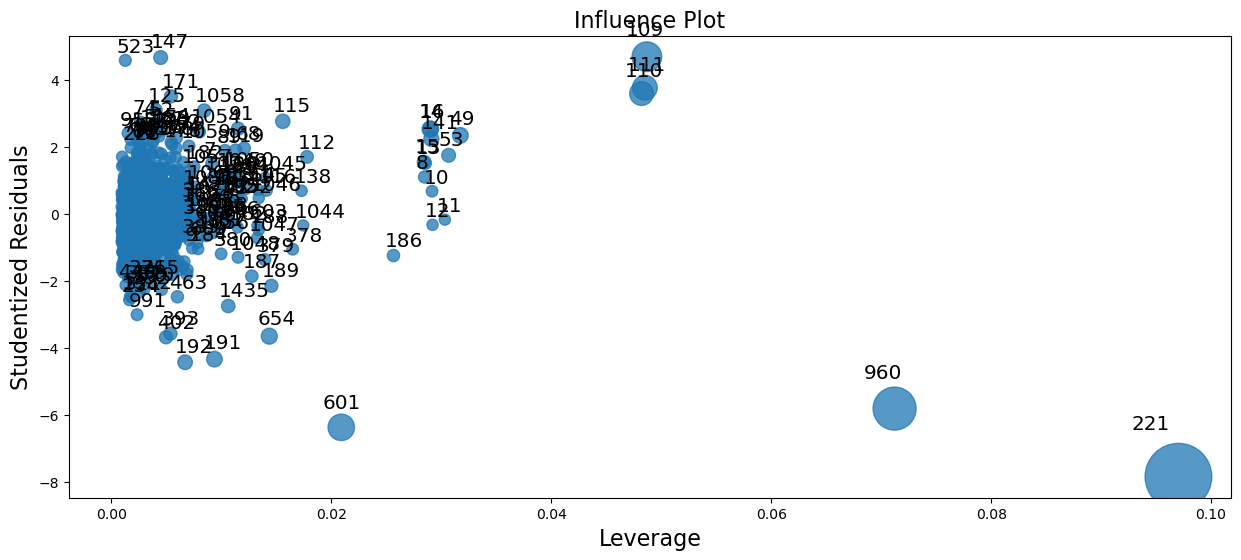

In [103]:
import statsmodels.api as sm

fig = plt.figure(figsize=(15,6)) 
sm.graphics.influence_plot(model1, ax=fig.gca())
plt.show()

In [105]:
import statsmodels.api as sm
import numpy as np

# Get the influence measures
influence = model1.get_influence()

# Get the leverage values (hat values)
leverage = influence.hat_matrix_diag

# Set your cut-off
leverage_cutoff = 0.04

# Get the indices of the data points with leverage greater than the cut-off
high_leverage_indices = np.where(leverage > leverage_cutoff)[0]

print("Indices with leverage greater than the 0.04 cut-off:")
print(high_leverage_indices)

Indices with leverage greater than the 0.04 cut-off:
[109 110 111 220 959]


In [113]:
cars2[cars2.index.isin([109, 110, 111, 220, 959, 960])]

,Price,Age,KM,HP,Weight
109,32500,4,1,116,1480
110,31000,4,4000,116,1480
111,31275,4,1500,116,1480
220,11950,43,74285,110,1075
959,8895,61,50925,110,1070
960,9390,66,50806,86,1480


In [117]:
#Discard the data points which are influencers and reasign the row number (reset_index())
cars3 =cars2.drop(cars2.index[[109, 110, 111, 220, 959, 960]],axis=0).reset_index()
cars3.head()

,index,Price,Age,KM,HP,Weight
0,0,13500,23,46986,90,1165
1,1,13750,23,72937,90,1165
2,2,13950,24,41711,90,1165
3,3,14950,26,48000,90,1165
4,4,13750,30,38500,90,1170


In [119]:
# Rebuild the model
model2 = smf.ols('Price~Age+KM+HP+Weight',data=cars3).fit()

In [123]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     2266.
Date:                Fri, 12 Sep 2025   Prob (F-statistic):               0.00
Time:                        07:31:11   Log-Likelihood:                -12256.
No. Observations:                1429   AIC:                         2.452e+04
Df Residuals:                    1424   BIC:                         2.455e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5503.3792   1044.461     -5.269      0.000   -7552.226   -3454.532
Age         -118.5797      2.596    -45.673      0.000    -123.673    -113.487
KM            -0.0202      0.001    -17.187      0.000      -0.023      -0.018
HP            29.2769      2.426     12.068      0.000      24.518      34.036
Weight        19.8465      0.916     21.678      0.000      18.051      21.642
==============================================================================
Omnibus:                      109.489   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              521.608
Skew:                          -0.153   Prob(JB):                    5.42e-114
Kurtosis:                       5.944   Cond. No.                     2.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
model_influence = model2.get_influence()
(c, _) = model_influence.cooks_distance

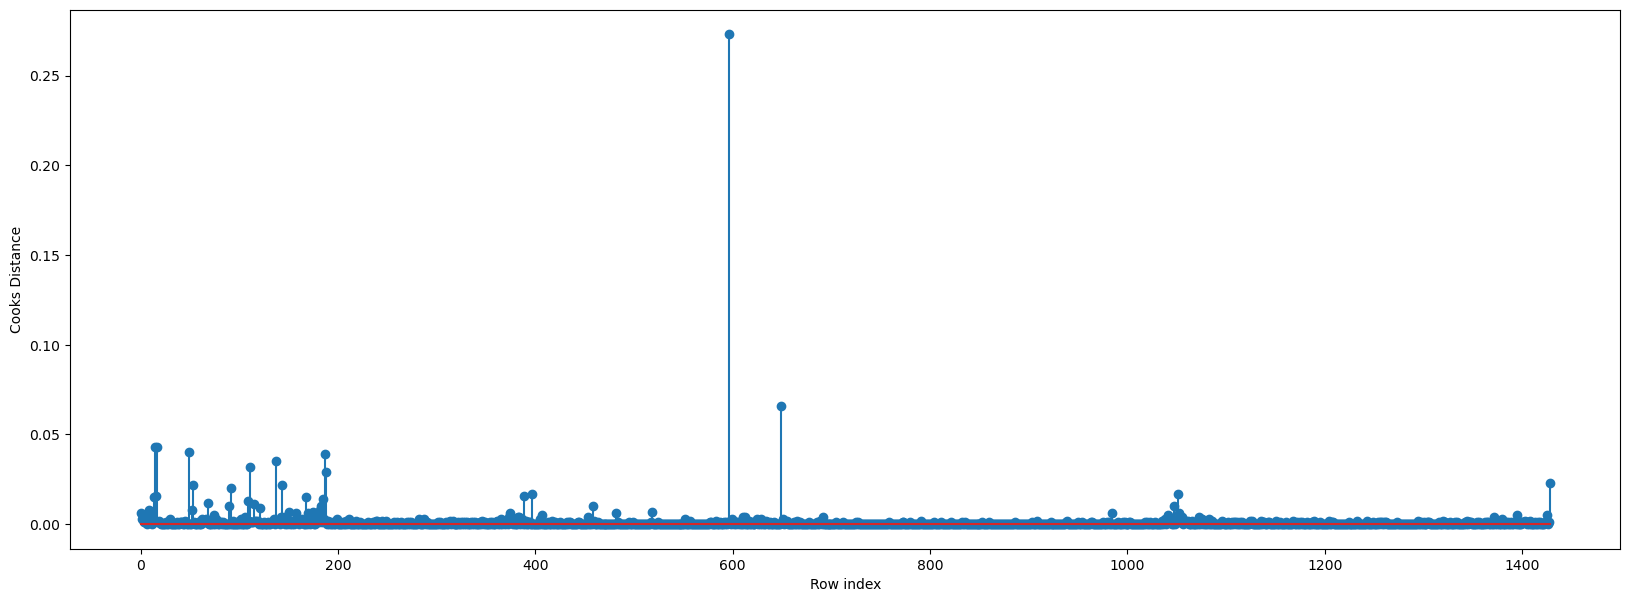

In [129]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

#### **Observations**
**Deleting outliers did not improve R squared value. Hence model1 can be accepted as final one.**


**Suggestion to students**:
Compare MSE for both models
